In [16]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter


In [17]:
df = pd.read_csv("bankloan.csv")

In [18]:
df = df.dropna()
df = df.drop(['Loan_ID','Married','Dependents','Education','Self_Employed','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis = 1)

In [24]:
df

,Gender,ApplicantIncome,Loan_Status
1,Male,4583,N
2,Male,3000,Y
3,Male,2583,Y
4,Male,6000,Y
5,Male,5417,Y
...,...,...,...
609,Female,2900,Y
610,Male,4106,Y
611,Male,8072,Y
612,Male,7583,Y


In [28]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status',axis=1)

dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1,N=0))

dm_X

,ApplicantIncome,Gender_Female,Gender_Male
1,4583,0,1
2,3000,0,1
3,2583,0,1
4,6000,0,1
5,5417,0,1
...,...,...,...
609,2900,1,0
610,4106,0,1
611,8072,0,1
612,7583,0,1


In [6]:
scaler = MinMaxScaler()
dm_X = scaler.fit_transform(dm_X)

In [26]:
dm_X


,ApplicantIncome,Gender_Female,Gender_Male
1,4583,0,1
2,3000,0,1
3,2583,0,1
4,6000,0,1
5,5417,0,1
...,...,...,...
609,2900,1,0
610,4106,0,1
611,8072,0,1
612,7583,0,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(dm_X,dm_y,test_size=0.2,shuffle=True,random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train,y_train)

y_pred = clf.predict([2344, 0, 1])
clf.score(X_test,y_test)

y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:

y_pred = clf.predict([[2344, 0, 1]])
y_pred[0]

1

In [11]:
X_test

array([[0.03862709, 0.        , 1.        ],
       [0.08204082, 0.        , 1.        ],
       [0.04155844, 0.        , 1.        ],
       [0.03525046, 0.        , 1.        ],
       [0.03875077, 0.        , 1.        ],
       [0.02561534, 0.        , 1.        ],
       [0.03627706, 0.        , 1.        ],
       [0.02390847, 0.        , 1.        ],
       [0.0225974 , 0.        , 1.        ],
       [0.0393692 , 0.        , 1.        ],
       [0.03772418, 0.        , 1.        ],
       [0.05689549, 0.        , 1.        ],
       [0.06577613, 0.        , 1.        ],
       [0.05461967, 0.        , 1.        ],
       [0.04267161, 0.        , 1.        ],
       [0.03471861, 0.        , 1.        ],
       [0.05132962, 1.        , 0.        ],
       [0.02458874, 1.        , 0.        ],
       [0.06801484, 0.        , 1.        ],
       [0.17975263, 0.        , 1.        ],
       [0.10121212, 1.        , 0.        ],
       [0.04555349, 0.        , 1.        ],
       [0.

In [7]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

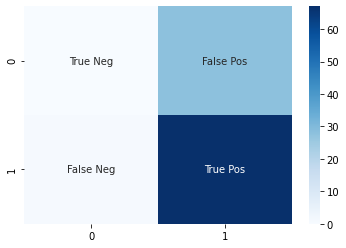

In [8]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [9]:
import pickle
from joblib import dump, load

filename = 'sdsp_model.pkl'
dump(clf, filename) 

scalerpickler = 'scaler.pkl'
dump(scaler, scalerpickler)

['scaler.pkl']

In [10]:
mdl = load('sdsp_model.pkl')